In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import torch
matplotlib.rc("font", family="MS Gothic")

In [5]:
df = pd.read_csv("population.csv", parse_dates=[0], index_col=0)

In [6]:
df1 = pd.DataFrame()
df1['渋谷'] = df['渋谷'][257:]
df2 = pd.DataFrame()
df2['新宿'] = df['新宿'][257:]
df3 = pd.DataFrame()
df3['丸の内'] = df['丸の内'][257:]
df4 = pd.DataFrame()
df4['品川'] = df['品川'][257:]
df5 = pd.DataFrame()
df5['下北沢'] = df['下北沢'][257:]
df6 = pd.DataFrame()
df6['八王子'] = df['八王子'][257:]
df7 = pd.DataFrame()
df7['大阪難波'] = df['大阪難波'][257:]
df8 = pd.DataFrame()
df8['札幌大通'] = df['札幌大通'][257:]
df9 = pd.DataFrame()
df9['仙台駅'] = df['仙台駅'][257:]
df10 = pd.DataFrame()
df10['福岡天神'] = df['福岡天神'][257:]

In [7]:
df1

,渋谷
日付,
2020-09-14,60400
2020-09-15,64900
2020-09-16,64600
2020-09-17,67300
2020-09-18,69500
...,...
2021-09-18,50700
2021-09-19,62200
2021-09-20,57300


In [8]:
pd_x = pd.read_csv("word.csv", parse_dates=[0], index_col=0)
#pd_x['day_of_week'] = pd_x.index.dayofweek
#pd_x['day_of_month'] = pd_x.index.day
#pd_x['month'] = pd_x.index.month

In [9]:
pd_e = pd.read_csv("emergency01.csv", parse_dates=[0], index_col=0)
pd_x['新宿_e'] = pd_e['shibuya'] 
pd_x['下北沢_e'] = pd_e['shimokitazawa'] 
pd_x['八王子_e'] = pd_e['hachiouji'] 
pd_x['大阪難波_e'] = pd_e['osaka'] 
pd_x['札幌大通_e'] = pd_e['sapporo']
pd_x['仙台駅_e'] = pd_e['sendai'] 
pd_x['福岡天神_e'] = pd_e['fukuoka'] 
#pd_w = pd.read_csv("5_level_larger.csv", parse_dates=[0], index_col=0)
#pd_x['新宿_w'] = pd_w['新宿'] 
#pd_x['下北沢_w'] = pd_w['下北沢'] 
#pd_x['八王子_w'] = pd_w['八王子'] 
#pd_x['大阪難波_w'] = pd_w['大阪難波'] 
#pd_x['札幌大通_w'] = pd_w['札幌大通']
#pd_x['仙台駅_w'] = pd_w['仙台駅'] 
#pd_x['福岡天神_w'] = pd_w['福岡天神'] 
#pd_i = pd.read_csv("covid_increase.csv", parse_dates=[0], index_col=0)
#pd_x['increase'] = pd_i['日本']

In [10]:
pd_day = pd.read_csv("off_day.csv", parse_dates=[0], index_col=0)
pd_x['off'] = pd_day['off'] 

In [11]:
pd_x

,渋谷,新宿,丸の内,品川,下北沢,八王子,大阪,札幌,仙台,福岡,東京 コロナ,コロナ 感染者数,コロナ ワクチン,コロナ 初期症状,コロナ 潜伏期間,緊急事態宣言,緊急事態宣言 東京,緊急事態宣言 再発令,緊急事態宣言とは,緊急事態宣言 解除,緊急事態宣言 仕事,大阪府 コロナウイルス感染者,大阪府 緊急事態宣言,北海道 コロナウイルス感染者,北海道 緊急事態宣言,宮城県 コロナウイルス感染者,宮城県 緊急事態宣言,福岡県 コロナウイルス感染者,福岡県 緊急事態宣言,デルタ株,ラムダ株,リモート とは,リモートワーク,リモート飲み会,居酒屋,飲み会,旅行,飲食店,営業時間,デリバリー,テイクアウト,コンビニ,マスク,アルコール,ランチ,美容院,カラオケ,温泉,チケット,新幹線,飛行機,レストラン,レシピ,動画,漫画,ゲーム,公園,自転車,台風,大雨,新宿_e,下北沢_e,八王子_e,大阪難波_e,札幌大通_e,仙台駅_e,福岡天神_e,off
日付,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2400,2700,160,260,330,1200,5400,3500,1600,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,380,30,1200,210,30,370,120,2100,250,250,250,510,2000,1700,450,3600,990,110,850,1300,3700,2400,180,1600,120,0,0,0,0,0,0,0,0,1
2020-01-02,1500,3400,230,260,390,1400,5800,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,800,10,1200,270,50,370,140,1400,310,140,470,790,2200,1700,510,4700,1000,150,960,1500,4100,2500,200,1800,230,0,0,0,0,0,0,0,0,0
2020-01-03,1900,3800,200,340,540,1400,6300,4000,2000,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,760,20,1300,230,70,480,140,1300,330,180,510,1000,2200,1800,520,5500,1100,130,1000,1700,4700,2200,300,2100,120,0,0,0,0,0,0,0,0,0
2020-01-04,1800,3600,200,350,660,1400,6500,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,810,20,1300,210,10,450,200,1300,790,240,560,1200,2100,1700,540,5700,1100,150,1100,1800,4500,2000,280,2400,110,0,0,0,0,0,0,0,0,1
2020-01-05,1400,2900,160,590,660,1400,6300,4000,1600,2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,100,0,560,20,1500,270,10,450,170,1300,520,200,500,1100,2100,1500,550,5300,1200,50,1200,1800,4600,1800,260,2500,120,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-18,820,1500,160,260,450,1500,1300,2400,620,910,62100,32400,16400,8900,3200,17100,600,30,20,570,0,240,50,20,430,50,190,11400,220,420,110,420,300,20,270,30,690,250,40,680,940,1100,3400,380,760,1500,1300,1000,600,6300,580,410,1400,2700,5300,2400,410,3100,63900,220,1,1,1,1,1,1,1,1
2021-09-19,820,1600,200,230,580,1600,1200,2400,560,840,57600,34000,14200,8500,2900,18700,680,10,30,860,0,260,100,20,370,40,150,13400,190,320,120,400,240,10,260,0,610,270,30,560,950,1100,3000,310,840,1300,1400,1000,340,2300,420,440,1200,2300,5000,2100,970,4000,6600,0,1,1,1,1,1,1,1,1
2021-09-20,770,1600,140,140,550,1600,1200,2200,500,760,52100,35800,13600,9500,3200,21900,930,0,40,1800,0,250,110,20,370,60,130,12500,170,460,130,470,290,20,220,20,630,240,20,700,720,1000,3100,390,840,1300,1200,1100,370,2400,540,400,1300,2400,4800,2300,840,4300,1900,0,1,1,1,1,1,1,1,1


In [12]:
from scipy.stats import pearsonr, spearmanr, kendalltau
all_list = set()
cols = np.array(pd_x.columns)

maru_list_plus = []
maru_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df3['丸の内']):], df3['丸の内'])
  r1, p1 = spearmanr(pd_x[col][-len(df3['丸の内']):], df3['丸の内'])
  r2, p2 = kendalltau(pd_x[col][-len(df3['丸の内']):], df3['丸の内'])
  if r >= 0.5 and p < 0.05 or r1 >= 0.5 or r2 >= 0.5:
    maru_list_plus.append((col, max(abs(r), abs(r1), abs(r2))))
  if r <= -0.5 and p < 0.05 or r1 <= -0.5 or r2 <0.5:
    maru_list_minus.append((col, max(abs(r), abs(r1), abs(r2))))
print('丸の内')
maru_list = sorted((maru_list_plus + maru_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(maru_list)
all_list.update(maru_list)

Shinagawa_list_plus = []
Shinagawa_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df4['品川']):], df4['品川'])
  r1, p1 = spearmanr(pd_x[col][-len(df4['品川']):], df4['品川'])
  r2, p2 = kendalltau(pd_x[col][-len(df4['品川']):], df4['品川'])
  if r >= 0.5 and p < 0.05 or r1 >= 0.5 or r2 >= 0.5:
    Shinagawa_list_plus.append((col, max(abs(r), abs(r1), abs(r2))))
  if r <= -0.5 and p < 0.05 or r1 <= -0.5 or r2 <0.5:
    Shinagawa_list_minus.append((col, max(abs(r), abs(r1), abs(r2))))
print('品川')
Shinagawa_list = sorted((Shinagawa_list_plus + Shinagawa_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(Shinagawa_list)
all_list.update(Shinagawa_list)


hachi_list_plus = []
hachi_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df6['八王子']):], df6['八王子'])
  r1, p1 = spearmanr(pd_x[col][-len(df6['八王子']):], df6['八王子'])
  r2, p2 = kendalltau(pd_x[col][-len(df6['八王子']):], df6['八王子'])
  if r >= 0.5 and p < 0.05 or r1 >= 0.5 or r2 >= 0.5:
    hachi_list_plus.append((col, max(abs(r), abs(r1), abs(r2))))
  if r <= -0.5 and p < 0.05 or r1 <= -0.5 or r2 <0.5:
    hachi_list_minus.append((col, max(abs(r), abs(r1), abs(r2))))
print('八王子')
hachi_list = sorted((hachi_list_plus + hachi_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(hachi_list)
all_list.update(hachi_list)



xian_list_plus = []
xian_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df9['仙台駅']):], df9['仙台駅'])
  r1, p1 = spearmanr(pd_x[col][-len(df9['仙台駅']):], df9['仙台駅'])
  r2, p2 = kendalltau(pd_x[col][-len(df9['仙台駅']):], df9['仙台駅'])
  if r >= 0.5 and p < 0.05 or r1 >= 0.5 or r2 >= 0.5:
    xian_list_plus.append((col, max(abs(r), abs(r1), abs(r2))))
  if r <= -0.5 and p < 0.05 or r1 <= -0.5 or r2 <0.5:
    xian_list_minus.append((col, max(abs(r), abs(r1), abs(r2))))
print('仙台駅')
xian_list = sorted((xian_list_plus + xian_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(xian_list)
all_list.update(xian_list)

fu_list_plus = []
fu_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df10['福岡天神']):], df10['福岡天神'])
  r1, p1 = spearmanr(pd_x[col][-len(df10['福岡天神']):], df10['福岡天神'])
  r2, p2 = kendalltau(pd_x[col][-len(df10['福岡天神']):], df10['福岡天神'])
  if r >= 0.5 and p < 0.05 or r1 >= 0.5 or r2 >= 0.5:
    fu_list_plus.append((col, max(abs(r), abs(r1), abs(r2))))
  if r <= -0.5 and p < 0.05 or r1 <= -0.5 or r2 <0.5:
    fu_list_minus.append((col, max(abs(r), abs(r1), abs(r2))))
print('福岡天神')
fu_list = sorted((fu_list_plus + fu_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(fu_list)
all_list.update(fu_list)

丸の内
[('漫画', 0.7995640301926512), ('off', 0.7827135032566158), ('テイクアウト', 0.7429247328264067), ('デリバリー', 0.7373060843600915)]
品川
[('off', 0.8561818616916452), ('漫画', 0.8072436694803028), ('デリバリー', 0.7281821786306742), ('テイクアウト', 0.7274578173749474)]
八王子
[('漫画', 0.736575291390327), ('デリバリー', 0.639532135100479), ('テイクアウト', 0.6173394149734096), ('off', 0.6038459592740042)]
仙台駅
[('漫画', 0.7135446227635651), ('off', 0.6864711116187474), ('テイクアウト', 0.663743554440092), ('デリバリー', 0.6177066490107748)]
福岡天神
[('漫画', 0.7855627712206276), ('off', 0.7575947308844895), ('デリバリー', 0.7176430429654718), ('テイクアウト', 0.7161230570500999)]


In [13]:
from collections import defaultdict
order_dict = defaultdict(list)
import statsmodels.api as sm
#plt.figure(figsize=[15, 7])
#sm.tsa.seasonal_decompose(pd_x['off'][300:330]).plot()

import warnings
import itertools
import statsmodels.api as sm
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
for cols in all_list:
  col, r = cols
  if col in order_dict:
    continue
  if col == 'off' or col == '新宿_e' or col == '大阪難波_e':
    continue
  
  d=q=range(0, 2)
  p = range(0,2)
  pdq=list(itertools.product(p,d,q))
  pdq_x_PDQs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
  a=[]
  b=[]
  c=[]
  wf=[]
  for param in pdq:
    for seasonal_param in pdq_x_PDQs:
      try:
        mod = sm.tsa.statespace.SARIMAX(pd_x[col][257:], order=param, seasonal_order=seasonal_param,enforce_invertibility=False, enforce_stationarity=False)
        results = mod.fit()
        #print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
        a = param
        b = seasonal_param
        c = results.aic
        wf.append((c,a,b))
      except:
        continue
  order_dict[col] = sorted(wf)[:10]
order_dict

defaultdict(list,
            {'ゲーム': [(4787.147412597672, (1, 1, 1), (0, 1, 1, 7)),
              (4789.128739331194, (1, 1, 1), (1, 1, 1, 7)),
              (4798.5940895887725, (0, 1, 1), (0, 1, 1, 7)),
              (4800.457314002375, (0, 1, 1), (1, 1, 1, 7)),
              (4807.803184955359, (1, 0, 1), (0, 1, 1, 7)),
              (4809.711548955149, (1, 0, 1), (1, 1, 1, 7)),
              (4844.429803720489, (1, 0, 0), (0, 1, 1, 7)),
              (4846.387031269876, (1, 0, 0), (1, 1, 1, 7)),
              (4857.805864199424, (1, 1, 0), (0, 1, 1, 7)),
              (4859.799557069349, (1, 1, 0), (1, 1, 1, 7))],
             'テイクアウト': [(4664.827535883543, (1, 1, 1), (0, 1, 1, 7)),
              (4666.813393464992, (1, 1, 1), (1, 1, 1, 7)),
              (4672.313252980743, (0, 1, 1), (0, 1, 1, 7)),
              (4674.311516941792, (0, 1, 1), (1, 1, 1, 7)),
              (4678.429210094768, (1, 0, 1), (0, 1, 1, 7)),
              (4680.356350479618, (1, 0, 1), (1, 1, 1, 7)),
   

In [ ]:
def generate_cv_ex(train, min_train_size, horizon, steps):
  res = []
  for i in range(0,len(train) - min_train_size - horizon + 1 - 4, steps):
    split_train = train[:min_train_size + i]
    split_val = train[min_train_size + i + 4:min_train_size+i+horizon + 4]
    start = train.index[min_train_size + i + 4]
    end = train.index[min_train_size+i + horizon - 1 + 4]
    yield split_train, split_val, start, end

In [ ]:
def cv_score(cv, order):
  _, o, s = order
  scores = []
  for cv_train, cv_test, ex_train, ex_val, start, end in cv:
    model = sm.tsa.statespace.SARIMAX(cv_train, exog=ex_train, order=o, seasonal_order=s)
    fit = model.fit()
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    #print(start, end)
    pred = fit.predict(start=start, end = end, exog = ex_val)
    #print(pred.values, cv_test.values)
    scores.append(100 * (abs(pred.values - cv_test.values) / cv_test.values).sum() / len(cv_test))
    print(100 * (abs(pred.values - cv_test.values) / cv_test.values).sum() / len(cv_test))
  return scores


In [ ]:
def cv_score_ex(cv, order):
  _, o, s = order
  scores = []
  for cv_train, cv_test, start, end in cv:
    try:
      model = sm.tsa.statespace.SARIMAX(cv_train, order=o, seasonal_order=s)
      fit = model.fit()
      start = pd.to_datetime(start)
      end = pd.to_datetime(end)
      pred = fit.predict(start=start, end = end)
      print(start, end)
      scores.append(100 * (abs(pred.values - cv_test.values) / cv_test.values).sum() / len(cv_test))
      #print(100 * (abs(pred.values - cv_test.values) / cv_test.values).sum() / len(cv_test))
    except:
      continue
  return scores


In [ ]:
best_orders = defaultdict(tuple)
for key, values in order_dict.items():
  #if key == 'テイクアウト':
  #  continue
  print(key) 
  scores_curr = []
  for v in values:
    cv_curr = generate_cv_ex(pd_x[key][257:], 332,9,9)
    new_score = cv_score_ex(cv_curr, v)
    print(pd.DataFrame(new_score).std(), pd.DataFrame(new_score).mean())
    scores_curr.append(sum(new_score) / len(new_score))

  best_orders[key] = order_dict[key][scores_curr.index(min(scores_curr))]
best_orders

漫画
2021-08-16 00:00:00 2021-08-24 00:00:00
2021-08-25 00:00:00 2021-09-02 00:00:00
2021-09-03 00:00:00 2021-09-11 00:00:00
2021-09-12 00:00:00 2021-09-20 00:00:00
0    2.471962
dtype: float64 0    7.456522
dtype: float64
2021-08-16 00:00:00 2021-08-24 00:00:00
2021-08-25 00:00:00 2021-09-02 00:00:00
2021-09-03 00:00:00 2021-09-11 00:00:00
2021-09-12 00:00:00 2021-09-20 00:00:00
0    2.46921
dtype: float64 0    7.392022
dtype: float64
2021-08-16 00:00:00 2021-08-24 00:00:00
2021-08-25 00:00:00 2021-09-02 00:00:00
2021-09-03 00:00:00 2021-09-11 00:00:00
2021-09-12 00:00:00 2021-09-20 00:00:00
0    2.989289
dtype: float64 0    7.329544
dtype: float64
2021-08-16 00:00:00 2021-08-24 00:00:00
2021-08-25 00:00:00 2021-09-02 00:00:00
2021-09-03 00:00:00 2021-09-11 00:00:00
2021-09-12 00:00:00 2021-09-20 00:00:00
0    3.099609
dtype: float64 0    7.211877
dtype: float64
2021-08-16 00:00:00 2021-08-24 00:00:00
2021-08-25 00:00:00 2021-09-02 00:00:00
2021-09-03 00:00:00 2021-09-11 00:00:00
2021-0

defaultdict(tuple,
            {'ゲーム': (4859.799557069349, (1, 1, 0), (1, 1, 1, 7)),
             'テイクアウト': (4721.753832460489, (1, 0, 0), (0, 1, 1, 7)),
             'デリバリー': (4496.385607294153, (1, 0, 1), (0, 1, 1, 7)),
             '漫画': (5116.193677696489, (1, 0, 0), (1, 1, 1, 7))})

In [ ]:
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
best_out_order = {}
best_out_order['デリバリー'] = ((1,0,1), (0,1,1,7))
best_out_order['漫画'] = ((1,0,0), (1,1,1,7))
best_out_order['ゲーム'] = ((1,1,0), (1,1,1,7))


"\nmodel=sm.tsa.statespace.SARIMAX(pd_x['公園'][305:], order=(1,0,1), seasonal_order=(1,1,1,7))\nfit = model.fit()\nstart = pd.to_datetime('2021-09-08 00:00:00')\nend = pd.to_datetime('2021-09-16 00:00:00')\npred_park = fit.predict(start=start, end=end)\nsns.lineplot(x='日付', y='公園',data=pd_x[-100:])\nsns.lineplot(data=pred_park)\nplt.xticks(rotation=90)\npred_park\n"

2021-09-23    1885.786022
2021-09-24    1965.419043
2021-09-25    2289.804931
2021-09-26    2239.425438
2021-09-27    1878.907852
2021-09-28    1900.919827
2021-09-29    1859.588088
2021-09-30    1916.072999
2021-10-01    1971.732018
2021-10-02    2303.403189
2021-10-03    2253.986961
2021-10-04    1887.936883
2021-10-05    1916.497606
Freq: D, dtype: float64

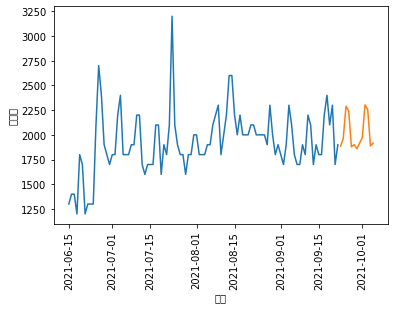

In [ ]:

model=sm.tsa.statespace.SARIMAX(pd_x['ゲーム'][257:], order=(1,1,0), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-23 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred_game = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='ゲーム',data=pd_x[-100:])
sns.lineplot(data=pred_game)
plt.xticks(rotation=90)
pred_game


2021-09-23    470.274638
2021-09-24    478.255783
2021-09-25    649.476085
2021-09-26    640.046713
2021-09-27    406.545924
2021-09-28    424.115147
2021-09-29    429.525839
2021-09-30    461.286582
2021-10-01    469.720678
2021-10-02    641.371103
2021-10-03    632.350179
2021-10-04    399.237254
2021-10-05    417.174796
Freq: D, dtype: float64

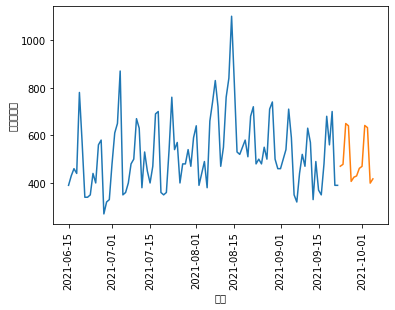

In [ ]:
model=sm.tsa.statespace.SARIMAX(pd_x['デリバリー'][257:], order=(1,0,1), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-23 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred_deli = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='デリバリー',data=pd_x[-100:])
sns.lineplot(data=pred_deli)
plt.xticks(rotation=90)
pred_deli

2021-09-23    4203.405723
2021-09-24    4291.408168
2021-09-25    4914.760101
2021-09-26    4839.139545
2021-09-27    4347.298216
2021-09-28    4161.391971
2021-09-29    4145.983834
2021-09-30    4239.018174
2021-10-01    4290.248375
2021-10-02    4906.560315
2021-10-03    4838.436920
2021-10-04    4326.924493
2021-10-05    4162.416802
Freq: D, dtype: float64

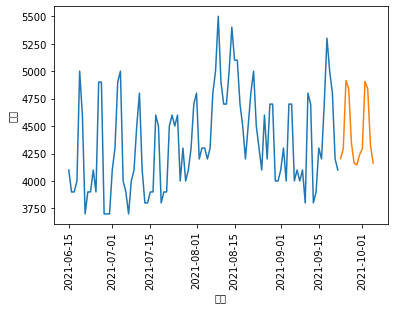

In [ ]:
model=sm.tsa.statespace.SARIMAX(pd_x['漫画'][257:], order=(1,0,0), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-23 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred_comic = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='漫画',data=pd_x[-100:])
sns.lineplot(data=pred_comic)
plt.xticks(rotation=90)
pred_comic

In [ ]:
"""
defaultdict(<class 'tuple'>, {'コンビニ':           pdq    pdq_x_PDQs          aic
defaultdict(<class 'tuple'>, {'デリバリー':           pdq    pdq_x_PDQs          aic
63  (1, 1, 1)  (1, 1, 1, 7)  3736.478868, 'テイクアウト':           pdq    pdq_x_PDQs          aic
59  (1, 1, 1)  (0, 1, 1, 7)  3880.665245, 'off':           pdq    pdq_x_PDQs         aic
39  (1, 0, 0)  (1, 1, 1, 7) -138.925319, '漫画':           pdq    pdq_x_PDQs          aic
59  (1, 1, 1)  (0, 1, 1, 7)  4181.985145, '大阪難波_e':           pdq    pdq_x_PDQs         aic
48  (1, 1, 0)  (0, 0, 0, 7)  111.911853, '公園':           pdq    pdq_x_PDQs          aic
63  (1, 1, 1)  (1, 1, 1, 7)  3680.194906, ''新宿_e:           pdq    pdq_x_PDQs         aic
48  (1, 1, 0)  (0, 0, 0, 7)  111.911853})
"""
pred = pd.DataFrame()
def syntex(pred):

  pred['日付'] = pd.date_range(start='09/23/2021', periods=13, freq='D')
  #pred['ランチ'] = pred_lunch.values
  pred['漫画'] = pred_comic.values
  pred['デリバリー'] = pred_deli.values
  #pred['カラオケ'] = pred_sing.values
  pred['ゲーム'] = pred_game.values
  #pred['レシピ'] = pred_len.values
  #pred['コンビニ'] = pred_store.values
  #pred['公園'] = pred_park.values
  #pred['テイクアウト'] = pred_take.values
  pred['off'] = [0,0,1,1,0,0,0,0,0,1,1,0,0]
  pred['大阪難波_e'] = [1,1,1,1,1,1,1,1,0,0,0,0,0]
  pred['下北沢_e'] = [1,1,1,1,1,1,1,1,0,0,0,0,0]
  pred['福岡天神_e'] = [1,1,1,1,1,1,1,1,0,0,0,0,0]
  pred['仙台駅_e'] = [1,1,1,1,1,1,1,1,0,0,0,0,0]
  pred['札幌大通_e'] = [1,1,1,1,1,1,1,1,0,0,0,0,0]
  pred['八王子_e'] = [1,1,1,1,1,1,1,1,0,0,0,0,0]
  pred['新宿_e']=[1,1,1,1,1,1,1,1,0,0,0,0,0]
  #pred['動画'] = pred_anime.values
  pred = pred.set_index('日付')


In [ ]:
exog_list = set()
exog_df = pd.DataFrame()
exog_df['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
for cols in all_list:
  col, r = cols
  if col in exog_list:
    continue
  exog_list.add(col)
  exog_df[col] = pd_x[col].values

exog_df = exog_df.set_index('日付')

exog_df.tail()


,漫画,デリバリー,大阪難波_e,off,新宿_e,テイクアウト,ゲーム
日付,,,,,,,
2021-09-18,5300,680,1,1,1,940,2400
2021-09-19,5000,560,1,1,1,950,2100
2021-09-20,4800,700,1,1,1,720,2300
2021-09-21,4200,390,1,0,1,380,1700
2021-09-22,4100,390,1,0,1,400,1900


In [ ]:
def generate_cv(train, min_train_size, horizon, steps, ex):
  for i in range(0,len(train) - min_train_size - horizon + 1 - 4, steps):
    split_train = train[:min_train_size + i]
    ex_train = ex[:min_train_size + i]
    split_val = train[min_train_size + i + 4:min_train_size+i+horizon + 4]
    #ex_val = ex[min_train_size + i + 4:min_train_size+i+horizon + 4]
    start = train.index[min_train_size + i + 4]
    end = train.index[min_train_size+i+horizon - 1 + 4]
    ex_val = pd.DataFrame()
    ex_val['日付'] = pd.date_range(start=train.index[min_train_size + i], periods=13, freq='D')
    for col in ex.columns:
      if col == 'off' or '_e' in col:
        continue
      o,s = best_out_order[col]
      model=sm.tsa.statespace.SARIMAX(pd_x[col][257:257 + min_train_size + i], order=o, seasonal_order=s)
      fit = model.fit()
      start = pd.to_datetime(train.index[min_train_size + i])
      end = pd.to_datetime(end)
      pred = fit.predict(start=start, end=end)
      ex_val[col] = pred.values
    if 'off' in ex.columns:
      ex_val['off'] = ex['off'][min_train_size + i:min_train_size+i+horizon + 4].values
    if '新宿_e' in ex.columns:
      ex_val['新宿_e'] = ex['新宿_e'][min_train_size + i:min_train_size+i+horizon + 4].values
    if '大阪難波_e' in ex.columns:
      ex_val['大阪難波_e'] = ex['大阪難波_e'][min_train_size + i:min_train_size+i+horizon + 4].values
    if '下北沢_e' in ex.columns:
      ex_val['下北沢_e'] = ex['下北沢_e'][min_train_size + i:min_train_size+i+horizon + 4].values
    if '福岡天神_e' in ex.columns:
      ex_val['福岡天神_e'] = ex['福岡天神_e'][min_train_size + i:min_train_size+i+horizon + 4].values  
    if '仙台駅_e' in ex.columns:
      ex_val['仙台駅_e'] = ex['仙台駅_e'][min_train_size + i:min_train_size+i+horizon + 4].values 
    if '八王子_e' in ex.columns:
      ex_val['八王子_e'] = ex['八王子_e'][min_train_size + i:min_train_size+i+horizon + 4].values  
    if '札幌大通_e' in ex.columns:
      ex_val['札幌大通_e'] = ex['札幌大通_e'][min_train_size + i:min_train_size+i+horizon + 4].values   
    ex_val = ex_val.set_index('日付')
    start = train.index[min_train_size + i + 4]
    print(start, end)
    yield split_train, split_val, ex_train, ex_val, start, end

1. To extract other factors for each area

  exog_area = other factors for training
  pred_exog_area = other factors for prediction

2. Find best Order and Seasonal Order

  a. Change endog variable
  
  b. Change exog variable


In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_maru = pd.DataFrame()
exog_maru['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_maru = pd.DataFrame()
pred_exog_maru['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
found = 0
for cols in maru_list:
  col, r = cols
  if col not in pred.columns:
    continue
  if col == 'デリバリー':
    continue
  if col == 'off':
    found = 1
    continue
  exog_maru[col] = pd_x[col].values
  pred_exog_maru[col] = pred[col].values
if found:
  exog_maru['off'] = pd_x['off'].values
  pred_exog_maru['off'] = pred['off'].values
exog_maru['新宿_e'] = pd_x['新宿_e'].values
pred_exog_maru['新宿_e'] = pred['新宿_e'].values
exog_maru = exog_maru.set_index('日付')
pred_exog_maru = pred_exog_maru.set_index('日付')
pred_exog_maru.tail(13)
#print(exog_maru)

,漫画,off,新宿_e
日付,,,
2020-09-23,4203.405723,0,1
2020-09-24,4291.408168,0,1
2020-09-25,4914.760101,1,1
2020-09-26,4839.139545,1,1
2020-09-27,4347.298216,0,1
2020-09-28,4161.391971,0,1
2020-09-29,4145.983834,0,1
2020-09-30,4239.018174,0,1
2020-10-01,4290.248375,0,0


In [ ]:
d=q=range(0, 2)
p = range(0,2)
pdq=list(itertools.product(p,d,q))
pdq_x_PDQs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
a=[]
b=[]
c=[]
wf=[]
for param in pdq:
  for seasonal_param in pdq_x_PDQs:
    try:
      mod = sm.tsa.statespace.SARIMAX(df3['丸の内'],exog=exog_maru[257:], order=param, seasonal_order=seasonal_param,enforce_invertibility=False, enforce_stationarity=False)
      results = mod.fit()
      #print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
      a = param
      b = seasonal_param
      c = results.aic
      wf.append((c,a,b))
    except:
      continue

maru_pdq_list = sorted(wf, key=lambda x:x[0])[:10]
maru_pdq_list

[(7317.726997938802, (1, 0, 1), (1, 1, 1, 7)),
 (7318.824081171535, (1, 1, 1), (1, 1, 1, 7)),
 (7322.171972414677, (0, 1, 1), (1, 1, 1, 7)),
 (7324.8844806257275, (1, 1, 1), (0, 1, 1, 7)),
 (7325.126154729169, (0, 1, 0), (1, 1, 1, 7)),
 (7327.734785773549, (1, 0, 1), (0, 1, 1, 7)),
 (7327.860403909306, (0, 1, 1), (0, 1, 1, 7)),
 (7331.726419780586, (0, 1, 0), (0, 1, 1, 7)),
 (7331.873343130304, (1, 0, 0), (1, 1, 0, 7)),
 (7339.1163125435905, (1, 0, 0), (1, 1, 1, 7))]

In [ ]:
scores_maru = []
for pdq in maru_pdq_list:
  cv_maru = generate_cv(df3['丸の内'], 332, 9,9, exog_maru[257:])
  new_score = cv_score(cv_maru, pdq)
  scores_maru.append(sum(new_score) / len(new_score))
  print(scores_maru)
print(scores_maru)

2021-08-16 00:00:00 2021-08-24 00:00:00
5.009620468105756
2021-08-25 00:00:00 2021-09-02 00:00:00
5.890292569765258
2021-09-03 00:00:00 2021-09-11 00:00:00
6.534860631410942
2021-09-12 00:00:00 2021-09-20 00:00:00
11.151420364693989
[7.146548508493986]
2021-08-16 00:00:00 2021-08-24 00:00:00
8.841879642782784
2021-08-25 00:00:00 2021-09-02 00:00:00
6.484382185660421
2021-09-03 00:00:00 2021-09-11 00:00:00
5.756976147704043
2021-09-12 00:00:00 2021-09-20 00:00:00
15.967761434422284
[7.146548508493986, 9.262749852642383]
2021-08-16 00:00:00 2021-08-24 00:00:00
9.233087823361164
2021-08-25 00:00:00 2021-09-02 00:00:00
7.48238699538454
2021-09-03 00:00:00 2021-09-11 00:00:00
5.5569864624017
2021-09-12 00:00:00 2021-09-20 00:00:00
15.238349889687887
[7.146548508493986, 9.262749852642383, 9.377702792708822]
2021-08-16 00:00:00 2021-08-24 00:00:00
9.426617275549075
2021-08-25 00:00:00 2021-09-02 00:00:00
4.708341812293918
2021-09-03 00:00:00 2021-09-11 00:00:00
5.630974107912433
2021-09-12 00

2021-09-27    83674.948969
2021-09-28    84296.116023
2021-09-29    83885.626711
2021-09-30    83643.709401
2021-10-01    96557.970476
2021-10-02    62384.031631
2021-10-03    60712.731289
2021-10-04    90606.661684
2021-10-05    91349.247471
Freq: D, dtype: float64

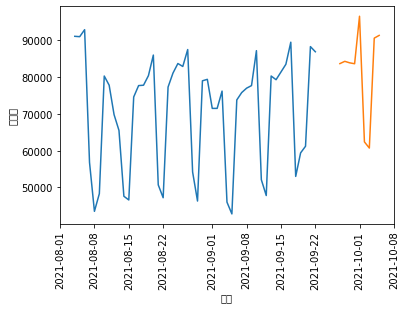

In [ ]:
model=sm.tsa.statespace.SARIMAX(df3['丸の内'],exog=exog_maru[257:], order=(1,0,1), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_maru)
result.append(pred)
sns.lineplot(x='日付', y='丸の内',data=df3[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_shina = pd.DataFrame()
exog_shina['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_shina = pd.DataFrame()
pred_exog_shina['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
found = 0
for cols in Shinagawa_list:
  col, r = cols
  if col == 'デリバリー':
    continue
  if col not in pred.columns:
    continue
  if col == 'off':
    found = 1
    continue
  exog_shina[col] = pd_x[col].values
  pred_exog_shina[col] = pred[col].values
if found:
  exog_shina['off'] = pd_x['off'].values
  pred_exog_shina['off'] = pred['off'].values
exog_shina['新宿_e'] = pd_x['新宿_e'].values
pred_exog_shina['新宿_e'] = pred['新宿_e'].values
exog_shina = exog_shina.set_index('日付')
pred_exog_shina = pred_exog_shina.set_index('日付')
exog_shina.tail(7)

,漫画,off,新宿_e
日付,,,
2021-09-16,4200,0,1
2021-09-17,4700,0,1
2021-09-18,5300,1,1
2021-09-19,5000,1,1
2021-09-20,4800,1,1
2021-09-21,4200,0,1
2021-09-22,4100,0,1


In [ ]:
def get_list(data, ex):
  d=q=range(0, 2)
  p = range(0,2)
  pdq=list(itertools.product(p,d,q))
  pdq_x_PDQs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
  a=[]
  b=[]
  c=[]
  wf=[]
  for param in pdq:
    for seasonal_param in pdq_x_PDQs:
      try:
        mod = sm.tsa.statespace.SARIMAX(data,exog=ex, order=param, seasonal_order=seasonal_param,enforce_invertibility=False, enforce_stationarity=False)
        results = mod.fit()
        #print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
        a = param
        b = seasonal_param
        c = results.aic
        wf.append((c,a,b))
      except:
        continue

  pdq_list = sorted(wf, key=lambda x:x[0])[:10]
  return pdq_list

In [ ]:
shinagawa_pdq_list = get_list(df4['品川'], exog_shina[257:])
shinagawa_pdq_list

[(6832.813593576112, (0, 1, 1), (1, 1, 1, 7)),
 (6837.257806082171, (0, 1, 1), (0, 1, 1, 7)),
 (6842.133178277667, (1, 1, 1), (0, 1, 1, 7)),
 (6842.696988161393, (1, 1, 1), (1, 1, 1, 7)),
 (6856.083218793456, (1, 0, 1), (1, 1, 1, 7)),
 (6862.373531585596, (1, 0, 1), (0, 1, 1, 7)),
 (6862.691176725599, (1, 0, 0), (0, 1, 1, 7)),
 (6868.917113058169, (0, 1, 0), (1, 1, 1, 7)),
 (6870.823358867583, (0, 1, 0), (0, 1, 1, 7)),
 (6875.511898972067, (1, 0, 1), (1, 1, 0, 7))]

In [ ]:
def get_cv_scores(data, ex ,l):
  score = []
  for pdq in l:
    cv = generate_cv(data, 332, 9,9, ex)
    new_score = cv_score(cv, pdq)
    score.append(sum(new_score) / len(new_score))

  return score

In [ ]:
scores_shina = get_cv_scores(df4['品川'], exog_shina[257:], shinagawa_pdq_list)
scores_shina

2021-08-16 00:00:00 2021-08-24 00:00:00
19.73758148638472
2021-08-25 00:00:00 2021-09-02 00:00:00
7.114203244278967
2021-09-03 00:00:00 2021-09-11 00:00:00
7.461666547455952
2021-09-12 00:00:00 2021-09-20 00:00:00
19.24844004279654
2021-08-16 00:00:00 2021-08-24 00:00:00
18.795684492557537
2021-08-25 00:00:00 2021-09-02 00:00:00
4.931996856033411
2021-09-03 00:00:00 2021-09-11 00:00:00
7.392463358213247
2021-09-12 00:00:00 2021-09-20 00:00:00
19.153108219195364
2021-08-16 00:00:00 2021-08-24 00:00:00
19.876476596421387
2021-08-25 00:00:00 2021-09-02 00:00:00
5.229204816122955
2021-09-03 00:00:00 2021-09-11 00:00:00
7.777774898498145
2021-09-12 00:00:00 2021-09-20 00:00:00
18.963016793329377
2021-08-16 00:00:00 2021-08-24 00:00:00
20.9036248588104
2021-08-25 00:00:00 2021-09-02 00:00:00
9.189777351818174
2021-09-03 00:00:00 2021-09-11 00:00:00
7.836449417343415
2021-09-12 00:00:00 2021-09-20 00:00:00
15.320578004064608
2021-08-16 00:00:00 2021-08-24 00:00:00
5.084567397953826
2021-08-25

[13.390472830229045,
 12.56831323149989,
 12.961618276092967,
 13.31260740800915,
 7.364463354230093,
 6.835201534658559,
 6.986021216359374,
 13.884277938347596,
 12.757939443941048,
 9.149807394433926]

2021-09-27    38296.965668
2021-09-28    38177.704950
2021-09-29    38497.040064
2021-09-30    38283.102389
2021-10-01    43348.826973
2021-10-02    24631.510383
2021-10-03    23037.300654
2021-10-04    41148.989077
2021-10-05    41056.381746
Freq: D, dtype: float64

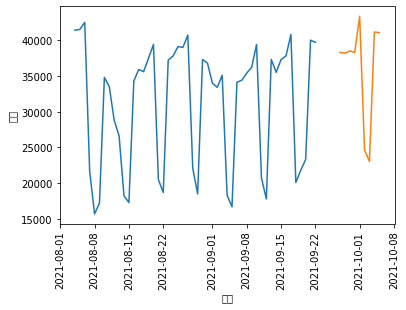

In [ ]:
model=sm.tsa.statespace.SARIMAX(df4['品川'],exog=exog_shina[257:], order=(1,0,1), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_shina)
result.append(pred)
sns.lineplot(x='日付', y='品川',data=df4[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_xiabei = pd.DataFrame()
exog_xiabei['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_xiabei = pd.DataFrame()
pred_exog_xiabei['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
found = 0
for cols in Shimokitazawa_list:
  col, r = cols
  if col == 'off':
    found = 1
    continue
  #if col == 'デリバリー':
  #  continue
  if col not in pred.columns:
    continue
  exog_xiabei[col] = pd_x[col].values
  pred_exog_xiabei[col] = pred[col].values
if found:
  exog_xiabei['off'] = pd_x['off'].values
  pred_exog_xiabei['off'] = pred['off'].values
exog_xiabei['下北沢_e'] = pd_x['下北沢_e'].values
pred_exog_xiabei['下北沢_e'] = pred['下北沢_e'].values
exog_xiabei = exog_xiabei.set_index('日付')
pred_exog_xiabei = pred_exog_xiabei.set_index('日付')
pred_exog_xiabei.tail(7)

,漫画,デリバリー,ゲーム,下北沢_e
日付,,,,
2020-09-29,4145.983834,429.525839,1859.588088,1
2020-09-30,4239.018174,461.286582,1916.072999,1
2020-10-01,4290.248375,469.720678,1971.732018,0
2020-10-02,4906.560315,641.371103,2303.403189,0
2020-10-03,4838.436920,632.350179,2253.986961,0
2020-10-04,4326.924493,399.237254,1887.936883,0
2020-10-05,4162.416802,417.174796,1916.497606,0


In [ ]:
xiabei_pdq_list = get_list(df5['下北沢'], exog_xiabei[257:])

scores_xiabei = get_cv_scores(df5['下北沢'], exog_xiabei[257:], xiabei_pdq_list)



2021-08-16 00:00:00 2021-08-24 00:00:00
3.776299635220928
2021-08-25 00:00:00 2021-09-02 00:00:00
5.760497108103348
2021-09-03 00:00:00 2021-09-11 00:00:00
8.570996982561118
2021-09-12 00:00:00 2021-09-20 00:00:00
9.633236457303719
2021-08-16 00:00:00 2021-08-24 00:00:00
3.8596014134477863
2021-08-25 00:00:00 2021-09-02 00:00:00
5.306016567538307
2021-09-03 00:00:00 2021-09-11 00:00:00
8.715534410975376
2021-09-12 00:00:00 2021-09-20 00:00:00
9.778215746161639
2021-08-16 00:00:00 2021-08-24 00:00:00
3.6865370705411413
2021-08-25 00:00:00 2021-09-02 00:00:00
6.185258838369872
2021-09-03 00:00:00 2021-09-11 00:00:00
8.361351240633503
2021-09-12 00:00:00 2021-09-20 00:00:00
10.122040723339314
2021-08-16 00:00:00 2021-08-24 00:00:00
5.2512449058880435
2021-08-25 00:00:00 2021-09-02 00:00:00
6.336633380772219
2021-09-03 00:00:00 2021-09-11 00:00:00
7.375349907597884
2021-09-12 00:00:00 2021-09-20 00:00:00
10.876528575640338
2021-08-16 00:00:00 2021-08-24 00:00:00
3.686308730775692
2021-08-2

In [ ]:
xiabei_pdq_list

[(6156.225000760003, (0, 1, 1), (0, 1, 1, 7)),
 (6156.508622413126, (1, 1, 1), (0, 1, 1, 7)),
 (6157.257234368368, (0, 1, 1), (1, 1, 1, 7)),
 (6174.077648661247, (1, 0, 1), (1, 1, 1, 7)),
 (6176.876100101491, (1, 0, 1), (0, 1, 1, 7)),
 (6178.729122767694, (1, 1, 0), (0, 1, 1, 7)),
 (6178.905850006287, (1, 1, 1), (1, 1, 1, 7)),
 (6179.406601654135, (1, 1, 0), (1, 1, 1, 7)),
 (6204.43975408923, (1, 0, 0), (0, 1, 1, 7)),
 (6205.531930749999, (0, 1, 0), (0, 1, 1, 7))]

In [ ]:
scores_xiabei

[6.935257545797278,
 6.9148420345307775,
 7.088796968220958,
 7.4599391924746214,
 6.682776403001485,
 6.939092348383534,
 6.632787798564554,
 7.216371287567641,
 6.263641655495317,
 7.00234788553974]

,漫画,デリバリー,ゲーム,下北沢_e
日付,,,,
2020-09-23,4203.405723,470.274638,1885.786022,1
2020-09-24,4291.408168,478.255783,1965.419043,1
2020-09-25,4914.760101,649.476085,2289.804931,1
2020-09-26,4839.139545,640.046713,2239.425438,1
2020-09-27,4347.298216,406.545924,1878.907852,1
2020-09-28,4161.391971,424.115147,1900.919827,1
2020-09-29,4145.983834,429.525839,1859.588088,1
2020-09-30,4239.018174,461.286582,1916.072999,1
2020-10-01,4290.248375,469.720678,1971.732018,0


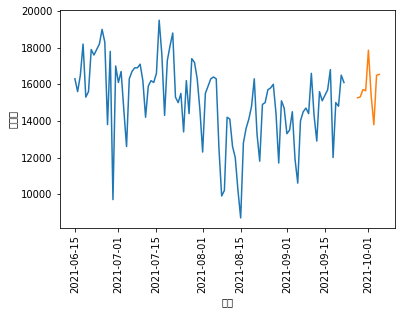

In [ ]:
model=sm.tsa.statespace.SARIMAX(df5['下北沢'],exog=exog_xiabei[257:], order=(1,0,0), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_xiabei)
result.append(pred)
sns.lineplot(x='日付', y='下北沢',data=df5[-100:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred


In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_hachi = pd.DataFrame()
exog_hachi['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_hachi = pd.DataFrame()
pred_exog_hachi['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in hachi_list:
  col, r = cols
  if col == 'デリバリー':
    continue
  if col not in pred.columns:
    continue
  exog_hachi[col] = pd_x[col].values
  pred_exog_hachi[col] = pred[col].values

exog_hachi['八王子_e'] = pd_x['八王子_e'].values
pred_exog_hachi['八王子_e'] = pred['八王子_e'].values  
exog_hachi = exog_hachi.set_index('日付')

pred_exog_hachi = pred_exog_hachi.set_index('日付')
pred_exog_hachi.tail(7)

,漫画,off,八王子_e
日付,,,
2020-09-29,4145.983834,0,1
2020-09-30,4239.018174,0,1
2020-10-01,4290.248375,0,0
2020-10-02,4906.560315,1,0
2020-10-03,4838.436920,1,0
2020-10-04,4326.924493,0,0
2020-10-05,4162.416802,0,0


In [ ]:
hachi_pdq_list = get_list(df6['八王子'], exog_hachi[257:])

scores_hachi = get_cv_scores(df6['八王子'], exog_hachi[257::], hachi_pdq_list)
scores_hachi

2021-08-16 00:00:00 2021-08-24 00:00:00
4.893517946148625
2021-08-25 00:00:00 2021-09-02 00:00:00
6.424331863685702
2021-09-03 00:00:00 2021-09-11 00:00:00
7.823011785011584
2021-09-12 00:00:00 2021-09-20 00:00:00
10.342032221754085
2021-08-16 00:00:00 2021-08-24 00:00:00
5.136063955447725
2021-08-25 00:00:00 2021-09-02 00:00:00
6.757479306422802
2021-09-03 00:00:00 2021-09-11 00:00:00
9.538036360083279
2021-09-12 00:00:00 2021-09-20 00:00:00
12.723478955241534
2021-08-16 00:00:00 2021-08-24 00:00:00
4.990420062839038
2021-08-25 00:00:00 2021-09-02 00:00:00
6.542215285422552
2021-09-03 00:00:00 2021-09-11 00:00:00
9.268349122449827
2021-09-12 00:00:00 2021-09-20 00:00:00
6.005606057996636
2021-08-16 00:00:00 2021-08-24 00:00:00
5.4007544542135255
2021-08-25 00:00:00 2021-09-02 00:00:00
5.311145643799376
2021-09-03 00:00:00 2021-09-11 00:00:00
10.693223127815989
2021-09-12 00:00:00 2021-09-20 00:00:00
13.075614957715533
2021-08-16 00:00:00 2021-08-24 00:00:00
5.319689830644701
2021-08-2

[7.370723454149999,
 8.538764644298835,
 6.701647632177013,
 8.620184545886104,
 8.46985608870235,
 8.436806890492287,
 6.729476456486596,
 9.002976322629893,
 8.672528132491394,
 7.072084114143209]

In [ ]:
hachi_pdq_list

[(5410.724939747126, (1, 0, 1), (1, 1, 1, 7)),
 (5413.046481729401, (1, 1, 1), (0, 1, 1, 7)),
 (5413.7114434893865, (1, 1, 1), (1, 1, 1, 7)),
 (5416.045552586342, (0, 1, 1), (1, 1, 1, 7)),
 (5416.358136340905, (0, 1, 1), (0, 1, 1, 7)),
 (5416.650573555252, (1, 0, 1), (0, 1, 1, 7)),
 (5439.565683896397, (1, 0, 0), (1, 1, 1, 7)),
 (5444.932043142455, (1, 1, 0), (1, 1, 1, 7)),
 (5445.730335510667, (1, 1, 0), (0, 1, 1, 7)),
 (5452.865757511212, (1, 0, 0), (0, 1, 1, 7))]

2021-09-27    5841.901242
2021-09-28    5948.678255
2021-09-29    6096.304440
2021-09-30    5952.306545
2021-10-01    6789.809559
2021-10-02    5685.379248
2021-10-03    4822.761863
2021-10-04    6263.717154
2021-10-05    6383.176912
Freq: D, dtype: float64

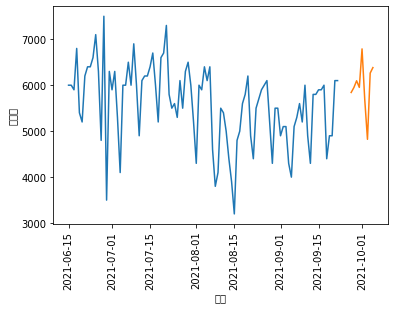

In [ ]:
model=sm.tsa.statespace.SARIMAX(df6['八王子'],exog=exog_hachi[257:], order=(1,1,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_hachi)
result.append(pred)
sns.lineplot(x='日付', y='八王子',data=df6[-100:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_xian = pd.DataFrame()
exog_xian['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_xian = pd.DataFrame()
pred_exog_xian['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in xian_list:
  col, r = cols
  if col not in pred.columns:
    continue
  if 'off' == col:
    continue
  exog_xian[col] = pd_x[col].values
  pred_exog_xian[col] = pred[col].values
exog_xian['off'] = pd_x['off'].values
pred_exog_xian['off'] = pred['off'].values
exog_xian['仙台駅_e'] = pd_x['仙台駅_e'].values
pred_exog_xian['仙台駅_e'] = pred['仙台駅_e'].values
exog_xian = exog_xian.set_index('日付')
pred_exog_xian = pred_exog_xian.set_index('日付')
pred_exog_xian.tail(7)

,漫画,デリバリー,off,仙台駅_e
日付,,,,
2020-09-29,4145.983834,429.525839,0,1
2020-09-30,4239.018174,461.286582,0,1
2020-10-01,4290.248375,469.720678,0,0
2020-10-02,4906.560315,641.371103,1,0
2020-10-03,4838.436920,632.350179,1,0
2020-10-04,4326.924493,399.237254,0,0
2020-10-05,4162.416802,417.174796,0,0


In [ ]:
xian_pdq_list = get_list(df9['仙台駅'], exog_xian[257:])
scores_xian = get_cv_scores(df9['仙台駅'], exog_xian[257:], xian_pdq_list)
xian_pdq_list

2021-08-16 00:00:00 2021-08-24 00:00:00
10.33971510995004
2021-08-25 00:00:00 2021-09-02 00:00:00
5.015760435357081
2021-09-03 00:00:00 2021-09-11 00:00:00
5.49903785683532
2021-09-12 00:00:00 2021-09-20 00:00:00
18.802600398417205
2021-08-16 00:00:00 2021-08-24 00:00:00
13.157228703926574
2021-08-25 00:00:00 2021-09-02 00:00:00
10.921028898305924
2021-09-03 00:00:00 2021-09-11 00:00:00
5.310904802108891
2021-09-12 00:00:00 2021-09-20 00:00:00
14.403929531477798
2021-08-16 00:00:00 2021-08-24 00:00:00
15.204921740653504
2021-08-25 00:00:00 2021-09-02 00:00:00
13.30882221498981
2021-09-03 00:00:00 2021-09-11 00:00:00
6.191786793235977
2021-09-12 00:00:00 2021-09-20 00:00:00
13.41700345619548
2021-08-16 00:00:00 2021-08-24 00:00:00
15.15361029191013
2021-08-25 00:00:00 2021-09-02 00:00:00
12.732421251147162
2021-09-03 00:00:00 2021-09-11 00:00:00
5.927588599309218
2021-09-12 00:00:00 2021-09-20 00:00:00
13.632648028981281
2021-08-16 00:00:00 2021-08-24 00:00:00
9.546325262401576
2021-08-

[(6186.65583823321, (1, 1, 1), (0, 1, 1, 7)),
 (6208.742544713743, (1, 1, 1), (1, 1, 1, 7)),
 (6209.022353813527, (1, 0, 1), (0, 1, 1, 7)),
 (6210.850755513627, (1, 0, 1), (1, 1, 1, 7)),
 (6213.276896272389, (0, 1, 1), (1, 1, 1, 7)),
 (6217.759972689061, (0, 1, 1), (0, 1, 1, 7)),
 (6226.172737899204, (1, 0, 0), (0, 1, 1, 7)),
 (6228.08791913791, (1, 0, 0), (1, 1, 1, 7)),
 (6238.435043115765, (1, 1, 0), (1, 1, 1, 7)),
 (6244.239973103778, (1, 1, 0), (0, 1, 1, 7))]

In [ ]:
scores_xian

[9.914278450139912,
 10.948272983954796,
 12.030633551268693,
 11.861567042836947,
 10.696586472572395,
 9.260250258579244,
 12.424984030134114,
 12.057474383921553,
 11.642239511640518,
 9.51964343039176]

2021-09-27    20003.367143
2021-09-28    19466.378491
2021-09-29    19505.767851
2021-09-30    19452.696649
2021-10-01    21613.520920
2021-10-02    16706.118914
2021-10-03    16475.932017
2021-10-04    21132.905360
2021-10-05    20601.253125
Freq: D, dtype: float64

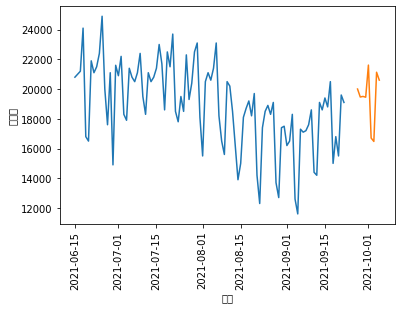

In [ ]:
model=sm.tsa.statespace.SARIMAX(df9['仙台駅'],exog=exog_xian[257:], order=(0,1,1), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_xian)
result.append(pred)
sns.lineplot(x='日付', y='仙台駅',data=df9[-100:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_fu = pd.DataFrame()
exog_fu['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_fu = pd.DataFrame()
pred_exog_fu['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in fu_list:
  col, r = cols
  if col not in pred.columns:
    continue
  if 'off' == col:
    continue
  exog_fu[col] = pd_x[col].values
  pred_exog_fu[col] = pred[col].values
exog_fu['off'] = pd_x['off'].values
pred_exog_fu['off'] = pred['off'].values
exog_fu['福岡天神_e'] = pd_x['福岡天神_e'].values
pred_exog_fu['福岡天神_e'] = pred['福岡天神_e'].values
exog_fu = exog_fu.set_index('日付')
pred_exog_fu = pred_exog_fu.set_index('日付')
pred_exog_fu.tail(7)

,漫画,デリバリー,off,福岡天神_e
日付,,,,
2020-09-29,4145.983834,429.525839,0,1
2020-09-30,4239.018174,461.286582,0,1
2020-10-01,4290.248375,469.720678,0,0
2020-10-02,4906.560315,641.371103,1,0
2020-10-03,4838.436920,632.350179,1,0
2020-10-04,4326.924493,399.237254,0,0
2020-10-05,4162.416802,417.174796,0,0


In [ ]:
fu_pdq_list = get_list(df10['福岡天神'], exog_fu[257:])
scores_fu = get_cv_scores(df10['福岡天神'], exog_fu[257:], fu_pdq_list)
fu_pdq_list

2021-08-16 00:00:00 2021-08-24 00:00:00
3.3379570405642536
2021-08-25 00:00:00 2021-09-02 00:00:00
6.272529176274893
2021-09-03 00:00:00 2021-09-11 00:00:00
11.50313001386164
2021-09-12 00:00:00 2021-09-20 00:00:00
7.93593670172913
2021-08-16 00:00:00 2021-08-24 00:00:00
5.576894128612592
2021-08-25 00:00:00 2021-09-02 00:00:00
9.126265634711167
2021-09-03 00:00:00 2021-09-11 00:00:00
11.989107263890796
2021-09-12 00:00:00 2021-09-20 00:00:00
7.603657928236331
2021-08-16 00:00:00 2021-08-24 00:00:00
3.0333222016907504
2021-08-25 00:00:00 2021-09-02 00:00:00
5.992809926048787
2021-09-03 00:00:00 2021-09-11 00:00:00
14.148191124607466
2021-09-12 00:00:00 2021-09-20 00:00:00
11.9365536732087
2021-08-16 00:00:00 2021-08-24 00:00:00
7.313700943322786
2021-08-25 00:00:00 2021-09-02 00:00:00
8.629554554943489
2021-09-03 00:00:00 2021-09-11 00:00:00
11.407619702385258
2021-09-12 00:00:00 2021-09-20 00:00:00
12.312211880660982
2021-08-16 00:00:00 2021-08-24 00:00:00
7.712616240057524
2021-08-25

[(6076.80774754979, (1, 1, 1), (1, 1, 1, 7)),
 (6077.165736794434, (1, 1, 1), (0, 1, 1, 7)),
 (6093.592247000779, (0, 1, 1), (1, 1, 1, 7)),
 (6098.211413798871, (0, 1, 1), (0, 1, 1, 7)),
 (6103.538192343976, (1, 0, 1), (1, 1, 1, 7)),
 (6107.229246353233, (1, 0, 1), (0, 1, 1, 7)),
 (6111.23983387579, (1, 1, 0), (1, 1, 1, 7)),
 (6114.31278731201, (0, 1, 0), (1, 1, 1, 7)),
 (6115.663204812177, (1, 1, 0), (0, 1, 1, 7)),
 (6118.54720195947, (0, 1, 0), (0, 1, 1, 7))]

In [ ]:
scores_fu

[7.262388233107479,
 8.573981238862721,
 8.777719231388925,
 9.915771770328128,
 7.985686726075652,
 7.8910103654183015,
 8.924089871022245,
 8.767312214762178,
 9.836803632991728,
 10.118969156213687]

2021-09-27    16310.358390
2021-09-28    16319.629769
2021-09-29    16454.359785
2021-09-30    16314.418157
2021-10-01    17214.820667
2021-10-02    11644.230249
2021-10-03     9607.762783
2021-10-04    16510.300497
2021-10-05    16641.965087
Freq: D, dtype: float64

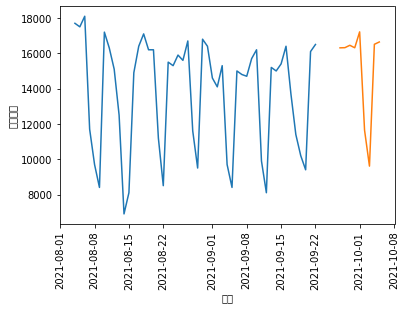

In [ ]:
model=sm.tsa.statespace.SARIMAX(df10['福岡天神'],exog=exog_fu[257:], order=(1,1,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_fu)
result.append(pred)
sns.lineplot(x='日付', y='福岡天神',data=df10[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
results = np.array(result, dtype=int).T
results

array([[62155, 45732, 84639, 38834, 15620,  5966, 29994, 16585, 20404,
        16379],
       [63095, 46125, 84071, 38727, 15885,  5949, 30218, 16658, 19536,
        16533],
       [65021, 47311, 85221, 39591, 16121,  6098, 30617, 16792, 19667,
        16740],
       [64171, 46542, 84915, 39509, 16055,  5983, 30491, 16645, 19680,
        16527],
       [68374, 50461, 90068, 41052, 16816,  6342, 32222, 17340, 21140,
        17159],
       [59400, 44815, 54715, 22186, 14129,  5225, 27677, 11413, 16033,
        11624],
       [52925, 39750, 51541, 19544, 12953,  4413, 24797,  9301, 15084,
         9850],
       [61728, 45294, 84002, 38461, 15434,  5832, 29778, 16505, 20104,
        16489],
       [63225, 46017, 83881, 38561, 15793,  5912, 30213, 16602, 19709,
        16641]])

In [ ]:
evaluation = df[-10:]
evaluation.index

DatetimeIndex(['2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16',
               '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
               '2021-09-21', '2021-09-22'],
              dtype='datetime64[ns]', name='日付', freq=None)

In [ ]:
df_result = pd.DataFrame(results, index=evaluation.index[:-1])
new_index = ['2021/9/27','2021/9/28', '2021/9/29','2021/9/30', '2021/10/1', '2021/10/2', '2021/10/3','2021/10/4', '2021/10/5']
df_result = df_result.reindex(new_index)
df_result = pd.DataFrame(results, index=df_result.index)
df_result

,0,1,2,3,4,5,6,7,8,9
日付,,,,,,,,,,
2021/9/27,62155,45732,84639,38834,15620,5966,29994,16585,20404,16379
2021/9/28,63095,46125,84071,38727,15885,5949,30218,16658,19536,16533
2021/9/29,65021,47311,85221,39591,16121,6098,30617,16792,19667,16740
2021/9/30,64171,46542,84915,39509,16055,5983,30491,16645,19680,16527
2021/10/1,68374,50461,90068,41052,16816,6342,32222,17340,21140,17159
2021/10/2,59400,44815,54715,22186,14129,5225,27677,11413,16033,11624
2021/10/3,52925,39750,51541,19544,12953,4413,24797,9301,15084,9850
2021/10/4,61728,45294,84002,38461,15434,5832,29778,16505,20104,16489
2021/10/5,63225,46017,83881,38561,15793,5912,30213,16602,19709,16641


In [ ]:
df_result.to_csv("final1.csv", header=False, date_format="%Y/%-m/%-d")

1.加紧急事态

2。pdq调成（0，2）之间 

3。加新增人数 